In [1]:
# Bibliotecas principais
import pandas as pd
import numpy as np

# Visualização
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from sklearn.metrics import confusion_matrix

# Base de Dados - Bolsonaro

## Abrindo a base de dados

In [2]:
# Carregando a base de dados
df_bolsonaro = pd.read_json(r'C:\Users\Gabriel\git_projects\natural_language_processing_for_politics\jairbolsonaro.json')

In [3]:
df_bolsonaro.head()

,created_at,id,id_str,full_text,truncated,display_text_range,entities,source,in_reply_to_status_id,in_reply_to_status_id_str,...,favorite_count,favorited,retweeted,lang,extended_entities,possibly_sensitive,quoted_status_id,quoted_status_id_str,quoted_status_permalink,quoted_status
0,2010-04-01 02:59:50+00:00,11402700435,11402700435,"EM ""DITADURA"" SEM PAREDÃO, ATÉ CHICO ALENCAR É...",False,"[0, 137]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""https://about.twitter.com/products/tw...",NaN,NaN,...,15,False,False,pt,NaN,NaN,NaN,NaN,NaN,NaN
1,2019-01-10 11:02:23+00:00,1083318129135112192,1083318129135112192,"Bom dia! 🇧🇷 #tbt com o amigo ""Canguru"", que já...",False,"[0, 90]","{'hashtags': [{'text': 'tbt', 'indices': [12, ...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,...,31618,False,False,pt,"{'media': [{'id': 1083318121841262592, 'id_str...",0.0,NaN,NaN,NaN,NaN
2,2019-07-19 02:04:16+00:00,1152036400138579968,1152036400138579968,- Para descontrair. Proibido queimar ovo. (Kkk...,False,"[0, 48]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/android"" ...",NaN,NaN,...,46637,False,False,pt,"{'media': [{'id': 1152036204247953408, 'id_str...",0.0,NaN,NaN,NaN,NaN
3,2018-10-09 02:52:56+00:00,1049492883328380928,1049492883328380928,Trecho de entrevista ao vivo para o Jornal Nac...,False,"[0, 65]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,...,56322,False,False,pt,"{'media': [{'id': 1049489244387983360, 'id_str...",0.0,NaN,NaN,NaN,NaN
4,2017-08-23 15:12:48+00:00,900375277557215232,900375277557215232,Querem criar o fundão bilionário na Reforma Po...,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,...,7147,False,False,pt,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Visão geral dos dados
df_bolsonaro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6794 entries, 0 to 6793
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype              
---  ------                     --------------  -----              
 0   created_at                 6794 non-null   datetime64[ns, UTC]
 1   id                         6794 non-null   int64              
 2   id_str                     6794 non-null   int64              
 3   full_text                  6794 non-null   object             
 4   truncated                  6794 non-null   bool               
 5   display_text_range         6794 non-null   object             
 6   entities                   6794 non-null   object             
 7   source                     6794 non-null   object             
 8   in_reply_to_status_id      896 non-null    float64            
 9   in_reply_to_status_id_str  896 non-null    float64            
 10  in_reply_to_user_id        938 non-null    float64            
 11  in_r

## Tratamento dos dados Datetime

In [5]:
# Criando uma nova coluna e extraindo apenas os dados de tempo que serão utilizados
def mudar_data(df):
  year = df['created_at'].dt.year
  month = df['created_at'].dt.month
  day = df['created_at'].dt.day
  hour = df['created_at'].dt.hour
  df['data_hora'] = pd.to_datetime({'year': year, 'month': month, 'day': day, 'hour': hour})
  return df

In [6]:
# Alterando alguns aspectos da data da base de dados
mudar_data(df_bolsonaro)
df_bolsonaro.drop('created_at', axis=1, inplace=True)

# Organizando a base de dados pela cronologia dos twites
df_bolsonaro = df_bolsonaro.sort_values('data_hora').reset_index(drop=True)

In [7]:
df_bolsonaro.head()

,id,id_str,full_text,truncated,display_text_range,entities,source,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,...,favorited,retweeted,lang,extended_entities,possibly_sensitive,quoted_status_id,quoted_status_id_str,quoted_status_permalink,quoted_status,data_hora
0,11398556610,11398556610,Boa noite a todos @depchicolanecar @reportercrime,False,"[0, 49]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""https://about.twitter.com/products/tw...",NaN,NaN,NaN,...,False,False,pt,NaN,NaN,NaN,NaN,NaN,NaN,2010-04-01 01:00:00
1,11398669496,11398669496,"Me desculpem, boa noite @depchicoalencar @repo...",False,"[0, 55]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""https://about.twitter.com/products/tw...",NaN,NaN,NaN,...,False,False,pt,NaN,NaN,NaN,NaN,NaN,NaN,2010-04-01 01:00:00
2,11399072031,11399072031,Os militares assumiram o governo em março de 6...,False,"[0, 134]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com"" rel=""nofollow"">Tw...",NaN,NaN,NaN,...,False,False,pt,NaN,NaN,NaN,NaN,NaN,NaN,2010-04-01 01:00:00
3,11399181472,11399181472,"Em 64, o povo ñ suportava + greves, desordem s...",False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""https://about.twitter.com/products/tw...",NaN,NaN,NaN,...,False,False,pt,NaN,NaN,NaN,NaN,NaN,NaN,2010-04-01 01:00:00
4,11400542675,11400542675,#debate64 No Brasil foram 300. Em Cuba 30 mil....,False,"[0, 134]","{'hashtags': [{'text': 'debate64', 'indices': ...","<a href=""https://about.twitter.com/products/tw...",NaN,NaN,NaN,...,False,False,pt,NaN,NaN,NaN,NaN,NaN,NaN,2010-04-01 02:00:00


## Tratamento dos dados numéricos

In [8]:
# Extraindo número de caracteres totais da coluna
def extrair_valor(df):
  lista=[]
  for c in df['display_text_range']:
    lista.append(c[1])

  return lista

df_bolsonaro['display_text_range'] = extrair_valor(df_bolsonaro)

## Drop das colunas com pouca relavância

**Como foi decidido o processo de exclusão das colunas?**
- O principal fator foi a relevância daquelas colunas durante as análises
- Após isso, as exclusões também foram realizadas com base nas features que possuiam um número excessivo de outliers ou que apenas possuíssem um único valor, p.e., as features booleanas que só possuíam valores falsos.
- A disposição das features na aplicação do método 'drop()' foi feita com base na ordem em que elas aparecem e nos conjuntos que foram separadas e analizados individualmente.

In [9]:
df_bolsonaro_final = df_bolsonaro.drop(['id', 'id_str', 'truncated', 'source', 'user',
                     'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'in_reply_to_screen_name',
                     'geo', 'coordinates', 'place', 'contributors',
                     'is_quote_status', 'favorited', 'retweeted',
                     'extended_entities', 'possibly_sensitive', 'entities', 'lang',
                     'quoted_status_id', 'quoted_status_id_str', 'quoted_status_permalink', 'quoted_status'], axis=1)

In [10]:
df_bolsonaro_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6794 entries, 0 to 6793
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   full_text           6794 non-null   object        
 1   display_text_range  6794 non-null   int64         
 2   retweet_count       6794 non-null   int64         
 3   favorite_count      6794 non-null   int64         
 4   data_hora           6794 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 265.5+ KB


## Tratamento dos dados de texto

In [11]:
# Importando bibliotecas para tratar textos
import spacy
from spacy.tokens import Doc
from spacy.lang.pt.stop_words import STOP_WORDS
import string
import emoji

In [12]:
# Acrescentando algumas stopwords na lista
pln = spacy.load('pt_core_news_sm')
STOP_WORDS.update(['hoje', 'dia', 'pt', '\n', '\n\n', 'haver',
                   '”', '“', 'falar', 'querer', 'chegar', 'algum',
                   'junto', 'ano', 'abraço', 'q', 'd', 'R$', '...',
                   'c/', 'p/', 'outro', 'ñ', 't', 'co', 'em este',
                   'Ricardo', 'stuckert', 'Paulo', 'foto', 'pra',
                   'gente', 'Stuckert', 'achar', 'voltar', 'de este',
                   'de esse', 'de o', 'em o', 'a o', 'por o', '🇷', '🇧'])

In [13]:
# Função para processar os dados de textos e realizar diversas alterações
def processamento(texto):
  texto=texto.lower()
  documento=pln(texto)
  lista1=[]
  # Unifica todas as palavras de mesma flexão verbal e desinência
  for p in documento:
    lista1.append(p.lemma_)

  lista2=[]
  # Retira as stopwords (palavras que atrapalham na análise)
  for p in lista1:
    if (p in STOP_WORDS) == False:
      lista2.append(p)

  lista3=[]
  # Retira todas as pontuações presentes no texto
  for p in lista2:
    if (p in string.punctuation) == False:
      lista3.append(p)

  lista4=[]
  # Retira todas as ocorrências de urls
  for p in lista3:
     if 'https://' not in p:
      lista4.append(p)

  lista5=[]
  # Retira todos os emojis
  for p in lista4:
    lista5.append(emoji.replace_emoji(p, ''))

  return lista5

In [14]:
def unir_texto(dataframe):
  conteudo=''
  for p in dataframe['full_text'].values:
    conteudo = conteudo + ' ' + p
  return conteudo

# Base de Dados - Lula

## Abrindo a base de dados

In [15]:
# Carregando a base de dados
df_lula = pd.read_json(r'C:\Users\Gabriel\git_projects\natural_language_processing_for_politics\LulaOficial.json')

In [16]:
df_lula.head()

,created_at,id,id_str,full_text,truncated,display_text_range,entities,source,in_reply_to_status_id,in_reply_to_status_id_str,...,favorite_count,favorited,retweeted,lang,extended_entities,possibly_sensitive,quoted_status_id,quoted_status_id_str,quoted_status_permalink,quoted_status
0,2018-08-17 16:23:04+00:00,1030490201460801541,1030490201460801536,"""O presidente Lula vai dar um passeio nessa el...",False,"[0, 212]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com"" rel=""nofollow"">Tw...",NaN,NaN,...,347,False,False,pt,NaN,NaN,NaN,NaN,NaN,NaN
1,2014-09-16 01:53:02+00:00,511694215735422976,511694215735422976,@dilmabr afirma que aqueles que querem acabar ...,False,"[0, 139]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,...,9,False,False,pt,NaN,NaN,NaN,NaN,NaN,NaN
2,2017-08-08 23:23:49+00:00,895063025996242944,895063025996242944,O PT deu cidadania para as mulheres fazerem po...,False,"[0, 95]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,NaN,...,203,False,False,pt,NaN,NaN,NaN,NaN,NaN,NaN
3,2017-10-18 11:24:23+00:00,920611514071076865,920611514071076864,Continuo sendo o lulinha paz e a amor. A gente...,False,"[0, 108]","{'hashtags': [{'text': 'LulanoRadio', 'indices...","<a href=""http://twitter.com"" rel=""nofollow"">Tw...",NaN,NaN,...,153,False,False,pt,NaN,NaN,NaN,NaN,NaN,NaN
4,2017-04-24 22:24:18+00:00,856634932764037120,856634932764037120,"Olhando as últimas pesquisas, vemos que a únic...",False,"[0, 100]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com"" rel=""nofollow"">Tw...",NaN,NaN,...,168,False,False,pt,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
df_lula.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14961 entries, 0 to 14960
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype              
---  ------                     --------------  -----              
 0   created_at                 14961 non-null  datetime64[ns, UTC]
 1   id                         14961 non-null  int64              
 2   id_str                     14961 non-null  int64              
 3   full_text                  14961 non-null  object             
 4   truncated                  14961 non-null  bool               
 5   display_text_range         14961 non-null  object             
 6   entities                   14961 non-null  object             
 7   source                     14961 non-null  object             
 8   in_reply_to_status_id      321 non-null    float64            
 9   in_reply_to_status_id_str  321 non-null    float64            
 10  in_reply_to_user_id        388 non-null    float64            
 11  in

## Tratamento dos dados Datetime

In [18]:
# Aplicando a função previamente criada na base de dados atual
mudar_data(df_lula)
df_lula.drop('created_at', axis=1, inplace=True)

In [19]:
# Organizando a base de dados pela cronologia dos twites
df_lula = df_lula.sort_values('data_hora').reset_index(drop=True)

In [20]:
df_lula.head()

,id,id_str,full_text,truncated,display_text_range,entities,source,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,...,favorited,retweeted,lang,extended_entities,possibly_sensitive,quoted_status_id,quoted_status_id_str,quoted_status_permalink,quoted_status,data_hora
0,506830992154562560,506830992154562560,@dilmabr e Lula saem agora pelas ruas de São B...,False,"[0, 109]","{'hashtags': [{'text': 'LulaeDilmanoABC', 'ind...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,131574396.0,...,False,False,pt,NaN,NaN,NaN,NaN,NaN,NaN,2014-09-02 15:00:00
1,506829483031425024,506829483031425024,Lula visita o @smabc e cumprimenta sindicalist...,False,"[0, 100]","{'hashtags': [{'text': 'LulaeDilmanoABC', 'ind...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,...,False,False,pt,NaN,NaN,NaN,NaN,NaN,NaN,2014-09-02 15:00:00
2,506822862733578240,506822862733578240,Acompanhe notícias da caminhada também pelo @p...,False,"[0, 82]","{'hashtags': [{'text': 'LulaeDilmanoABC', 'ind...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,...,False,False,pt,NaN,NaN,NaN,NaN,NaN,NaN,2014-09-02 15:00:00
3,506833131694206976,506833131694206976,"""Os trabalhadores estão com @dilmabr "", diz o...",False,"[0, 134]","{'hashtags': [{'text': 'LulaeDilmanoABC', 'ind...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,...,False,False,pt,NaN,NaN,NaN,NaN,NaN,NaN,2014-09-02 15:00:00
4,506833558066192384,506833558066192384,Mais de 2 mil pessoas acompanham @dilmabr e Lu...,False,"[0, 92]","{'hashtags': [{'text': 'LulaeDilmanoABC', 'ind...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,...,False,False,pt,NaN,NaN,NaN,NaN,NaN,NaN,2014-09-02 15:00:00


## Tramento dos dados numéricos

In [21]:
# Extraindo valores
valores = extrair_valor(df_lula)
df_lula['display_text_range'] = valores

## Dropando as colunas com pouca relevância

In [22]:
# Excluindo as colunas que foram previamente excluídas
df_lula_final = df_lula.drop(['id', 'id_str', 'truncated', 'source', 'user',
                     'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'in_reply_to_screen_name',
                     'geo', 'coordinates', 'place', 'contributors',
                     'is_quote_status', 'favorited', 'retweeted',
                     'extended_entities', 'possibly_sensitive', 'entities', 'lang',
                     'quoted_status_id', 'quoted_status_id_str', 'quoted_status_permalink', 'quoted_status'], axis=1)

In [23]:
df_lula_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14961 entries, 0 to 14960
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   full_text           14961 non-null  object        
 1   display_text_range  14961 non-null  int64         
 2   retweet_count       14961 non-null  int64         
 3   favorite_count      14961 non-null  int64         
 4   data_hora           14961 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 584.5+ KB


# Tratamento dos outliers

In [24]:
# Dataframes de teste
bolsonaro_outliers = df_bolsonaro_final.copy()

# Dataframes de texte
lula_outliers = df_lula_final.copy()

In [25]:
# Extraindo as colunas numéricas
num_cols = []
for c in bolsonaro_outliers:
  if bolsonaro_outliers[c].dtype == 'int64':
    num_cols.append(c)

num_cols

['display_text_range', 'retweet_count', 'favorite_count']

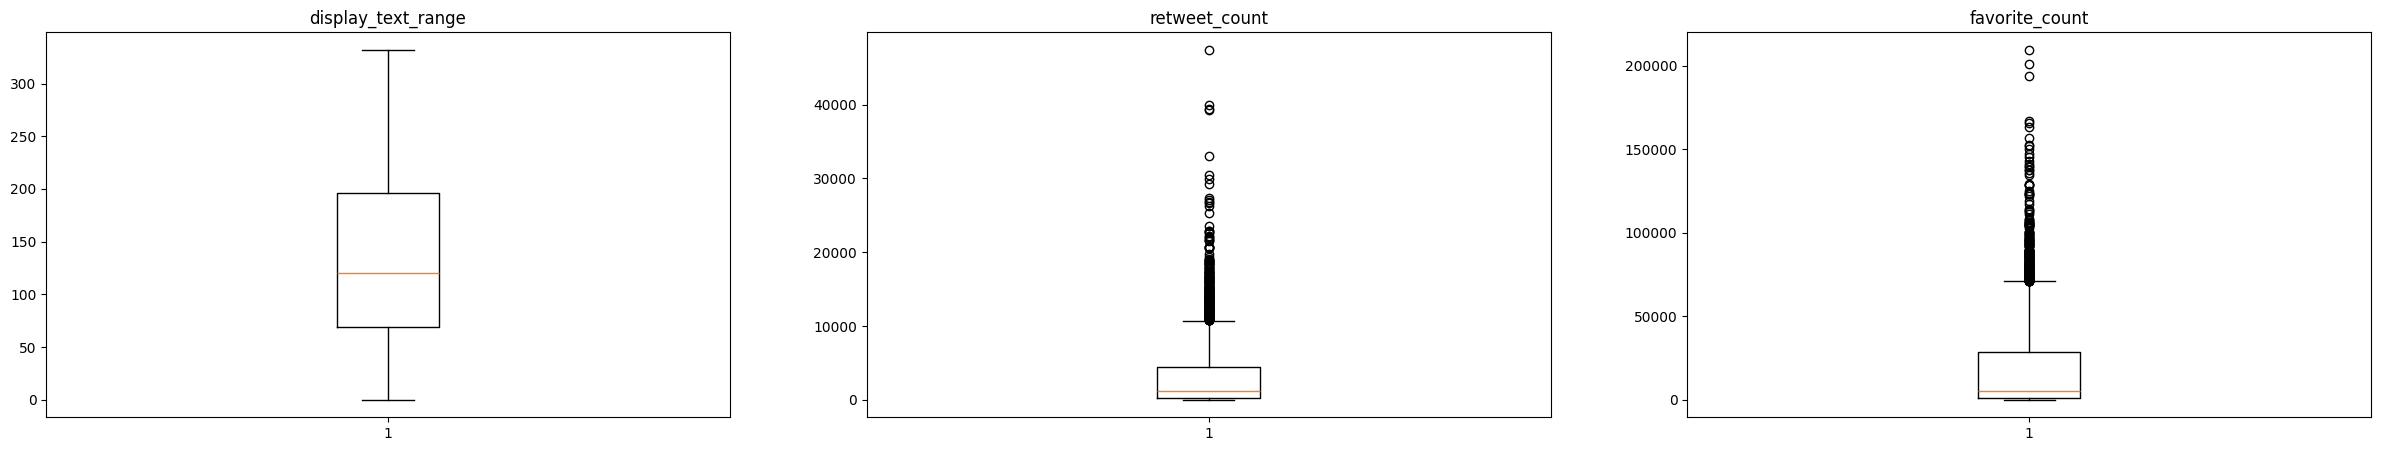

In [26]:
# Boxplot
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(30, 5))

# columns = [str(column) for column in num_cols]
for num, name in enumerate(num_cols):
  axs[num].boxplot(bolsonaro_outliers[name])
  axs[num].set_title(name)

plt.show()

In [27]:
# Após a remoção dos outliers
def remover_outliers(df):
  for col in num_cols:
    Tquart = np.quantile(df[col], 0.75)
    Fquart = np.quantile(df[col], 0.25)
    df_filtrado = df[(df[col] < Tquart) & (df[col] > Fquart)]

    return df_filtrado

In [28]:
# Novo dataframe Bolsonaro
df_filtrado_bolsonaro = remover_outliers(bolsonaro_outliers)
df_filtrado_bolsonaro = df_filtrado_bolsonaro.reset_index(drop=True)

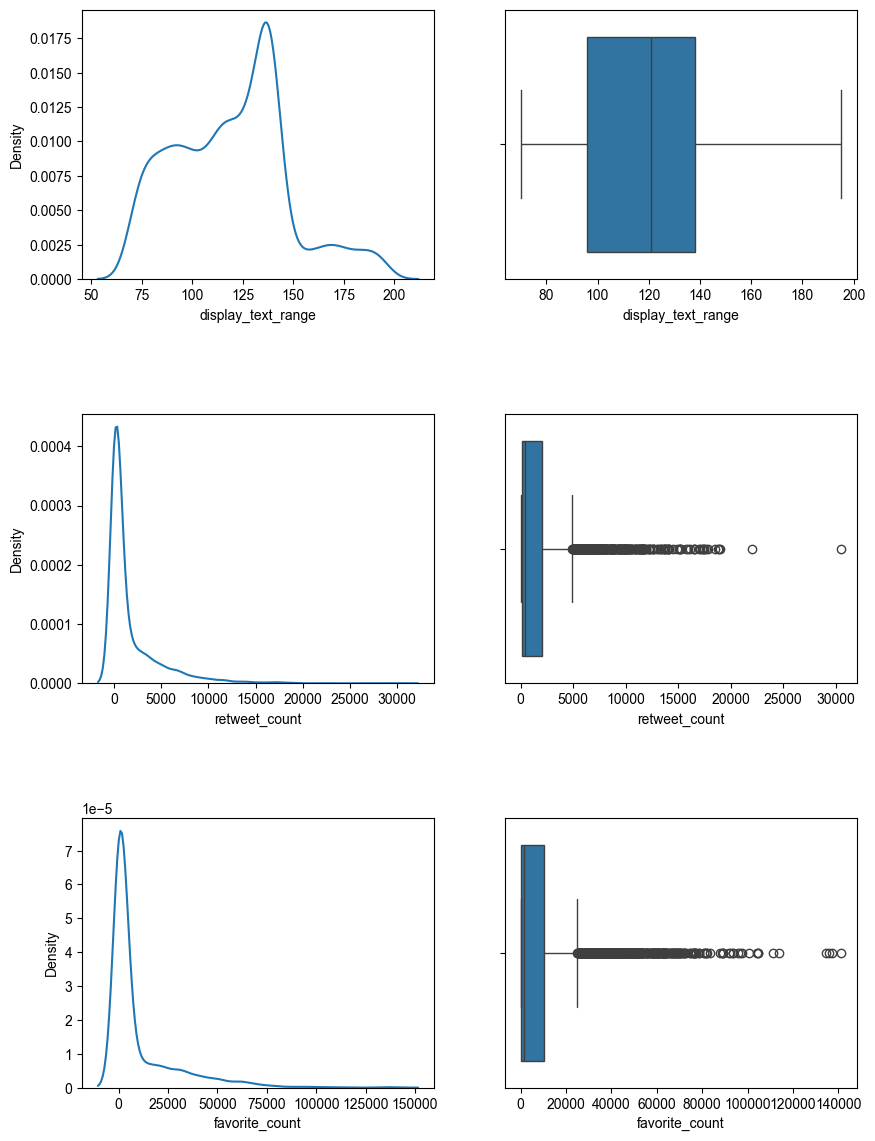

In [29]:
# Dados filtrados Bolsonaro
fig, ax = plt.subplots(len(num_cols), 2, figsize=(10, 14))

for i, coluna in enumerate(num_cols):
    sns.kdeplot(data=df_filtrado_bolsonaro, x=coluna, ax = ax[i][0])
    sns.boxplot(data=df_filtrado_bolsonaro, x=coluna, ax = ax[i][1])
    sns.set_style("whitegrid")

fig.subplots_adjust(hspace = 0.5)
plt.show()

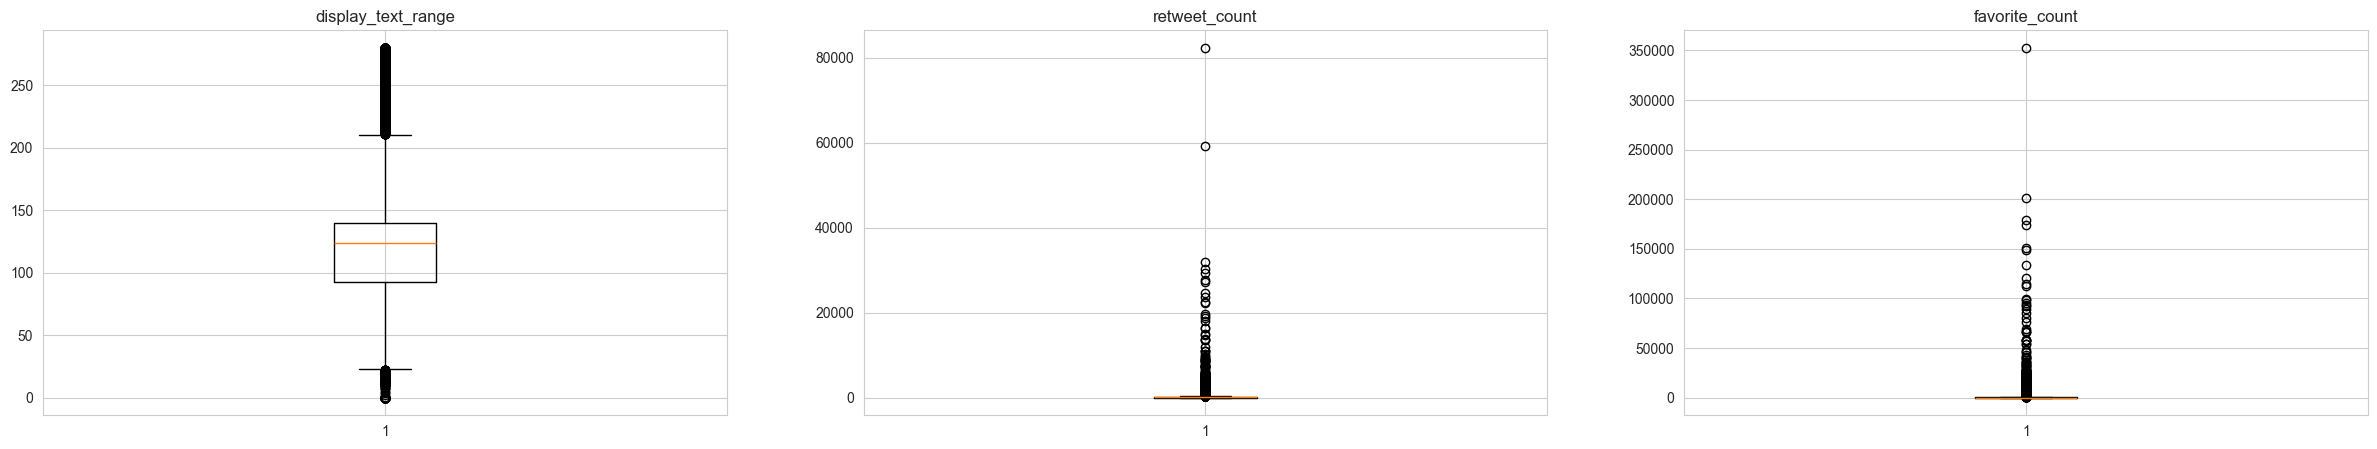

In [30]:
# Distribuição do Lula
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(30, 5))

for num, name in enumerate(num_cols):
  axs[num].boxplot(lula_outliers[name])
  axs[num].set_title(name)

plt.show()

In [31]:
# Novo dataframe
df_filtrado_lula = remover_outliers(lula_outliers)
df_filtrado_lula = df_filtrado_lula.reset_index()

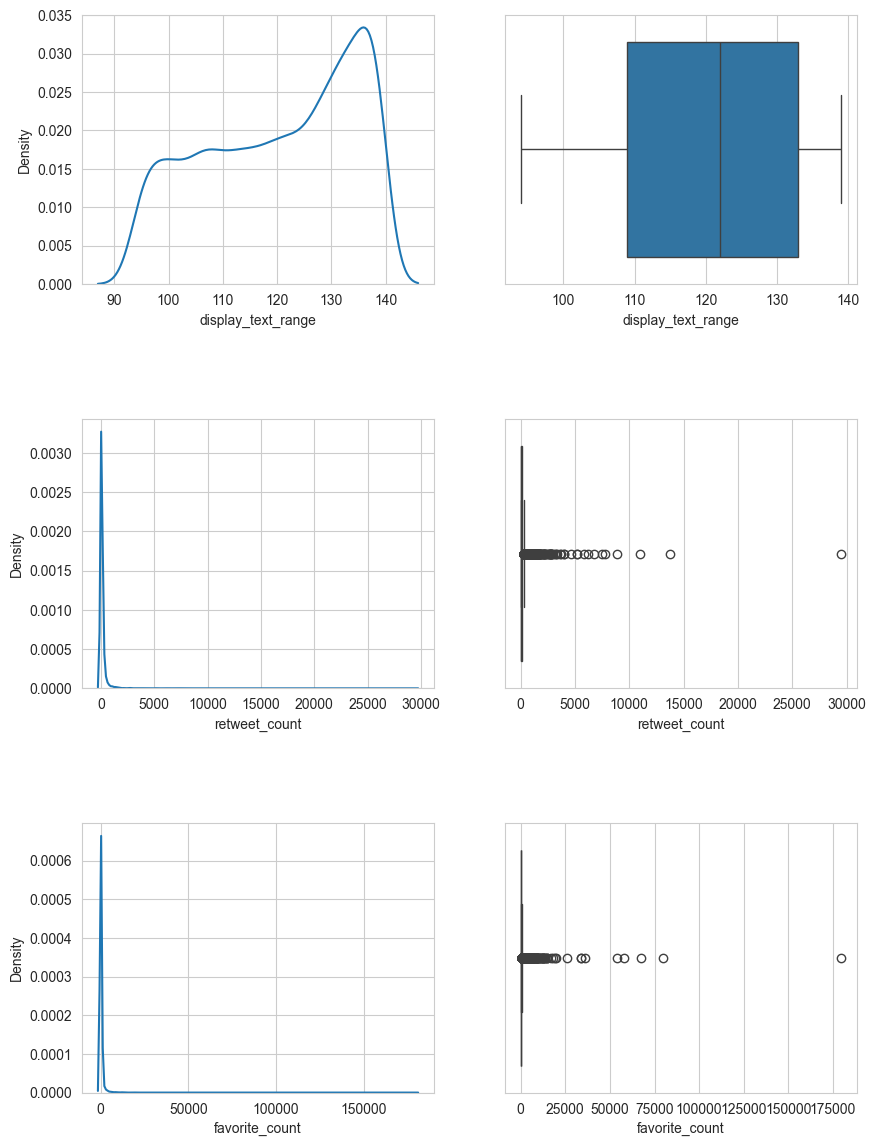

In [32]:
# Dados filtrados Lula
fig, ax = plt.subplots(len(num_cols), 2, figsize=(10, 14))

for i, coluna in enumerate(num_cols):
    sns.kdeplot(data=df_filtrado_lula, x=coluna, ax = ax[i][0])
    sns.boxplot(data=df_filtrado_lula, x=coluna, ax = ax[i][1])
    sns.set_style("whitegrid")

fig.subplots_adjust(hspace = 0.5)
plt.show()

# Análises Gerais

## Comparação entre as médias de engajamento

In [33]:
medias_b = df_bolsonaro_final.loc[:, ['retweet_count', 'favorite_count', 'display_text_range']].mean()
medias_l = df_lula_final.loc[:, ['retweet_count', 'favorite_count', 'display_text_range']].mean()

medianas_b = df_bolsonaro_final.loc[:, ['retweet_count', 'favorite_count', 'display_text_range']].median()
medianas_l = df_lula_final.loc[:, ['retweet_count', 'favorite_count', 'display_text_range']].median()


df_descriptive_stats = pd.DataFrame({'Engajamento Bolsonaro': {'media_retweet': medias_b.values[0],
                                                               'media_favorite': medias_b.values[1],
                                                               'media_palavras': medias_b.values[2],
                                                               'mediana_retweet': medianas_b.values[0],
                                                               'mediana_favorite': medianas_b.values[1],
                                                               'mediana_palavras':medianas_b.values[2]},
                                     'Engajamento Lula': {'media_retweet': medias_l.values[0],
                                                          'media_favorite': medias_l.values[1],
                                                          'media_palavras': medias_l.values[2],
                                                          'mediana_retweet': medianas_l.values[0],
                                                          'mediana_favorite': medianas_l.values[1],
                                                          'mediana_palavras': medianas_l.values[2]}})

In [34]:
# Dados das médias, medianas e quantidade de palavras
medias = [2832.191934, 282.220039]
medianas = [1123.500000, 81.000000]
palavras = [133.314542, 128.579440]
labels = ['Engajamento Bolsonaro', 'Engajamento Lula']

# Criando os objetos de barra para cada métrica
bar_medias = go.Bar(x=labels, y=medias, name='Médias')
bar_medianas = go.Bar(x=labels, y=medianas, name='Medianas')
bar_palavras = go.Bar(x=labels, y=palavras, name='Quantidade de Palavras')

# Criando o layout do gráfico
layout = go.Layout(title='Comparação de Médias, Medianas e Quantidade de Palavras',
                   xaxis=dict(title='Métricas'),
                   yaxis=dict(title='Valores'))

# Criando a figura e adicionando as barras
fig = go.Figure(data=[bar_medias, bar_medianas, bar_palavras], layout=layout)

# Exibindo o gráfico
fig.show()


## Palavras em destaque do Bolsonaro para as publicações com relevância

In [35]:
# Estabelecendo como parâmetro de relevância do twitter publicações com mais de mil retweets e mil favoritos
engajamento_bolsonaro = df_bolsonaro_final[(df_bolsonaro_final['retweet_count'] > 1000) &
                                           (df_bolsonaro_final['favorite_count'] > 1000)]

In [36]:
# Unificando todas as colunas
conteudo_engaj = unir_texto(engajamento_bolsonaro)

# Aplica a função de tratamento
resultado_engaj = processamento(conteudo_engaj)

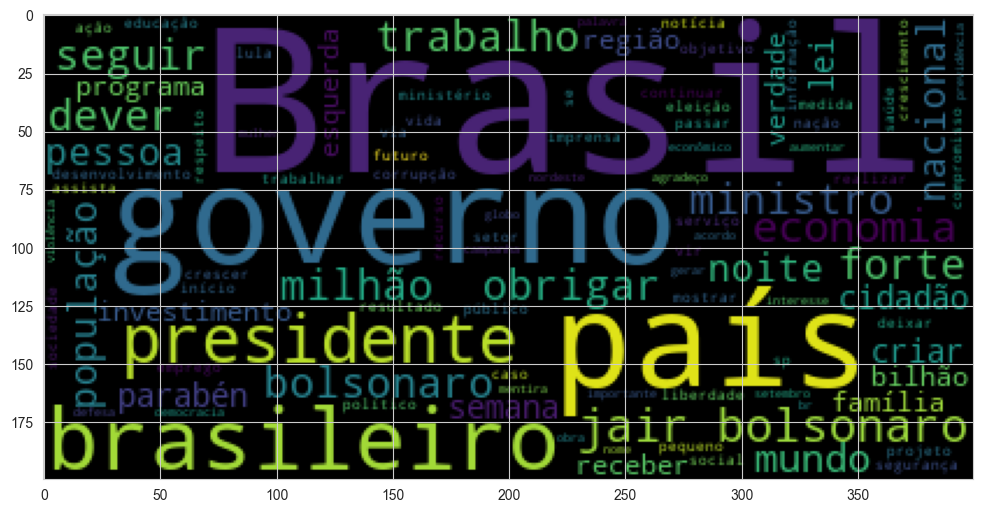

In [40]:
# Extrai as palavras com maior recorrência
analise_b = pd.Series(resultado_engaj).value_counts()
analise_b = analise_b.drop(['', 'semana', 'seguir', 'semana', '2019', ' ', 'jair', 'programa', '2018', 'noite', 'receber', 'parabéns', 'live', 'via', 'gerar', 'consideração', 'vir'], axis=0)

# Plotando as palavras com maiores recorrência
from wordcloud import WordCloud
cloud = WordCloud(max_words=100, colormap='viridis')
cloud = cloud.generate(' '.join(resultado_engaj))
plt.figure(figsize=(12, 8))
plt.imshow(cloud)

In [42]:
# Dados das palavras e suas quantidades
palavras = analise_b[0:20].index
quantidades = analise_b[0:20].values

# Definir uma lista de cores
cores = ['#636EFA', '#EF553B', '#00CC96', '#AB63FA', '#FFA15A', 
         '#19D3F3', '#FF6692', '#B6E880', '#FF97FF', '#FECB52',
         '#1F77B4', '#FF7F0E', '#2CA02C', '#D62728', '#9467BD',
         '#8C564B', '#E377C2', '#7F7F7F', '#BCBD22', '#17BECF']

# Criar o gráfico de barras
fig = go.Figure(data=[go.Bar(x=palavras, y=quantidades, marker=dict(color=cores))])

# Configurar layout
fig.update_layout(
    title='Quantidade de Ocorrências de Palavras',
    xaxis_title='Palavras',
    yaxis_title='Quantidade'
)

# Exibir o gráfico
fig.show()

## Palavras em destaque do Lula para as publicações com relevância

In [43]:
# Descobrindo as palavras com mais engajamento entre os anos de 2014 e 2020
engajamento_lula = df_lula_final[(df_lula_final['retweet_count'] > 1000) & (df_lula_final['favorite_count'] > 1000)]

In [44]:
# Unir todas as linhas num único texto
conteudo_lula = unir_texto(engajamento_lula)

# Tratar devidamente o texto
resultado_lula=processamento(conteudo_lula)

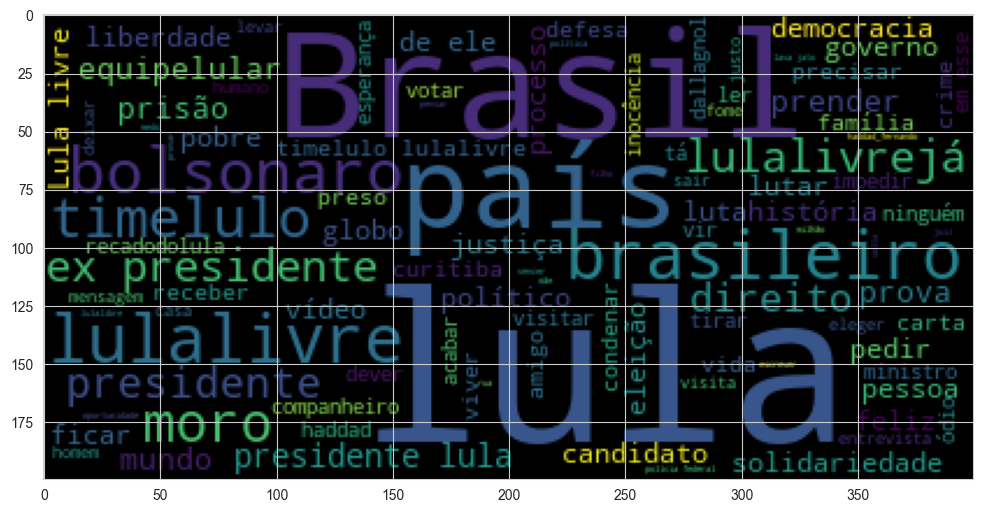

In [45]:
# Extrai as palavras com maior recorrência
analise_l = pd.Series(resultado_lula).value_counts()
analise_l = analise_l.drop(['Lula', 'lulalivre', 'timelulo', 'lulalivrejá','vídeo', 'equipelular', 'vídeo', ' ', 'pedir', 'curitiba', 'ficar','Moro', 'juiz', 'federal','sair', 'amigo', 'carta', 'São', 'nenhum', '', 'companheiro', 'ler', 'entrevista', ' ', 'visitar', 'tá', 'em esse', 'dallagnol', 'ninguém'])

# Plotando as palavras com maiores recorrência
from wordcloud import WordCloud
cloud = WordCloud(max_words=100, colormap='viridis')
cloud = cloud.generate(' '.join(resultado_lula))
plt.figure(figsize=(12, 8))
plt.imshow(cloud)

In [47]:
# Dados das palavras e suas quantidades
palavras = analise_l[0:20].index
quantidades = analise_l[0:20].values

# Definir uma lista de cores
cores = ['#636EFA', '#EF553B', '#00CC96', '#AB63FA', '#FFA15A', 
         '#19D3F3', '#FF6692', '#B6E880', '#FF97FF', '#FECB52',
         '#1F77B4', '#FF7F0E', '#2CA02C', '#D62728', '#9467BD',
         '#8C564B', '#E377C2', '#7F7F7F', '#BCBD22', '#17BECF']

# Criar o gráfico de barras
fig = go.Figure(data=[go.Bar(x=palavras, y=quantidades, marker=dict(color=cores))])

# Configurar layout
fig.update_layout(
    title='Quantidade de Ocorrências de Palavras',
    xaxis_title='Palavras',
    yaxis_title='Quantidade'
)

# Exibir o gráfico
fig.show()

## Crescimento de engajamento do Bolsonaro e do Lula entre os anos de 2014 e 2020

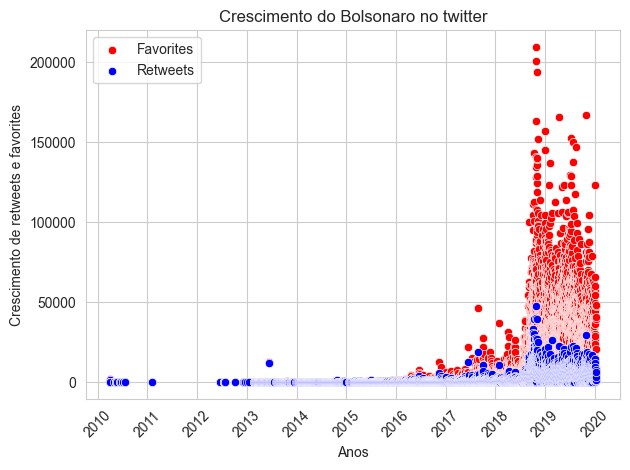

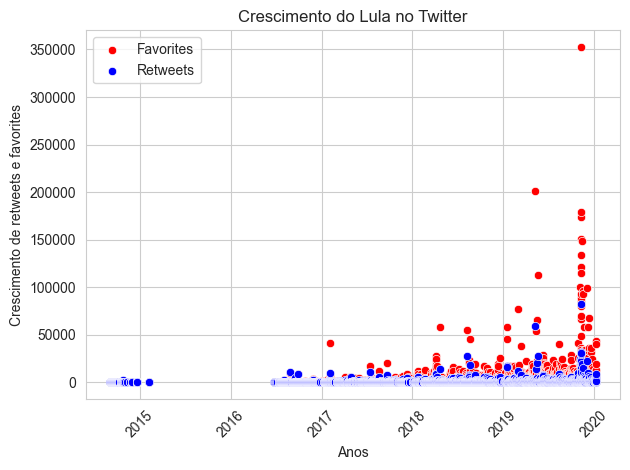

In [48]:
# Dados Bolsonaro
sns.scatterplot(data=df_bolsonaro_final, x='data_hora', y='favorite_count', color='red', label='Favorites')
sns.scatterplot(data=df_bolsonaro_final, x='data_hora', y='retweet_count', color='blue', label='Retweets')

# Definir título e rótulos dos eixos
plt.title('Crescimento do Bolsonaro no twitter')
plt.xlabel('Anos')
plt.ylabel('Crescimento de retweets e favorites')

# Girar os rótulos do eixo x
plt.xticks(rotation=45)

# Exibir o gráfico
plt.tight_layout()
plt.show()


# Dados Lula
sns.scatterplot(data=df_lula_final, x='data_hora', y='favorite_count', color='red', label='Favorites')
sns.scatterplot(data=df_lula_final, x='data_hora', y='retweet_count', color='blue', label='Retweets')


# Definir título e rótulos dos eixos
plt.title('Crescimento do Lula no Twitter')
plt.xlabel('Anos')
plt.ylabel('Crescimento de retweets e favorites')

# Girar os rótulos do eixo x
plt.xticks(rotation=45)

# Exibir o gráfico
plt.tight_layout()
plt.show()

# Marcos temporais

## Impeachment Dilma

### Posição do Bolsonaro

In [ ]:
# Posição do Bolsonaro
imp_bolsonaro = df_bolsonaro_final.loc[df_bolsonaro_final['data_hora'].dt.year == 2016]
imp_bolsonaro.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 868 entries, 957 to 1824
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   full_text           868 non-null    object        
 1   display_text_range  868 non-null    int64         
 2   retweet_count       868 non-null    int64         
 3   favorite_count      868 non-null    int64         
 4   data_hora           868 non-null    datetime64[ns]
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 40.7+ KB


In [ ]:
# Unificando todas as colunas
conteudo_imp_bolsonaro = unir_texto(imp_bolsonaro)

# Aplica a função de tratamento
resultado_imp_bolsonaro = processamento(conteudo_imp_bolsonaro)

In [ ]:
# Excluindo palavras sem relevância
analise_bolsonaro = pd.Series(resultado_imp_bolsonaro).value_counts()
analise_fixed_bolsonaro = analise_bolsonaro.drop(['', ' ', '@bolsonarosp', '@carlosbolsonaro', '@flaviobolsonaro', 'obrigar', 'rj', 'bolsonaro', 'jair'], axis=0)

In [ ]:
def count_incidences(dataframe, keywords):
    count_dict = {}

    for keyword in keywords:
        incidences = dataframe['full_text'].str.contains(keyword, case=False)
        filtered_data = dataframe[incidences]
        count_dict[keyword] = len(filtered_data)

    return count_dict

In [ ]:
def count_retweet(dataframe, keywords):
    count_dict = {}

    for keyword in keywords:
        dataframe['incidencia'] = dataframe['full_text'].str.contains(keyword, case=False)
        filtered_data = dataframe.loc[dataframe['incidencia'] == True]
        count_dict[keyword] = filtered_data['retweet_count'].sum()

    return count_dict

In [ ]:
def count_favorite(dataframe, keywords):
    count_dict = {}

    for keyword in keywords:
        dataframe['incidencia'] = dataframe['full_text'].str.contains(keyword, case=False)
        filtered_data = dataframe.loc[dataframe['incidencia'] == True]
        count_dict[keyword] = filtered_data['favorite_count'].sum()

    return count_dict

In [ ]:
# Separando as 12 palavras de maior incidência e relevância
count_bolsonaro_imp = pd.Series(count_incidences(imp_bolsonaro, analise_fixed_bolsonaro[0:12].index))
count_bolsonaro_favorite = pd.Series(count_favorite(imp_bolsonaro, analise_fixed_bolsonaro[0:12].index))
count_bolsonaro_retweet = pd.Series(count_retweet(imp_bolsonaro, analise_fixed_bolsonaro[0:12].index))

<ipython-input-51-3415c7ee0a2e>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-50-6ee77cf8402a>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



### Posição do Lula

In [ ]:
# Posição do Lula
imp_lula = df_lula_final.loc[df_lula_final['data_hora'].dt.year == 2016]
imp_lula.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2074 entries, 1581 to 3654
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   full_text           2074 non-null   object        
 1   display_text_range  2074 non-null   int64         
 2   retweet_count       2074 non-null   int64         
 3   favorite_count      2074 non-null   int64         
 4   data_hora           2074 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 97.2+ KB


In [ ]:
# Unificando todas as colunas
conteudo_imp_lula = unir_texto(imp_lula)

# Aplica a função de tratamento
resultado_imp_lula = processamento(conteudo_imp_lula)

In [ ]:
# Extraindo as palavras com maior incidência
analise_lula = pd.Series(resultado_imp_lula).value_counts()
analise_fixed_lula = analise_lula.drop(['precisar', 'lula', 'Lula', 'governar'], axis=0)

In [ ]:
count_lula_imp = pd.Series(count_incidences(imp_lula, analise_fixed_lula[0:12].index))
count_lula_favorite = pd.Series(count_favorite(imp_lula, analise_fixed_lula[0:12].index))
count_lula_retweet = pd.Series(count_retweet(imp_lula, analise_fixed_lula[0:12].index))

<ipython-input-51-3415c7ee0a2e>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-50-6ee77cf8402a>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



### Análises Comparativas (Impeachment da Dilma)

In [ ]:
df_impeachment = pd.DataFrame({
    'len_bolsonaro': count_bolsonaro_imp,
    'favorite_bolsonaro': count_bolsonaro_favorite,
    'retweet_bolsonaro': count_bolsonaro_retweet,
    'len_lula': count_lula_imp,
    'retweet_lula': count_lula_retweet,
    'favorite_lula': count_lula_favorite})

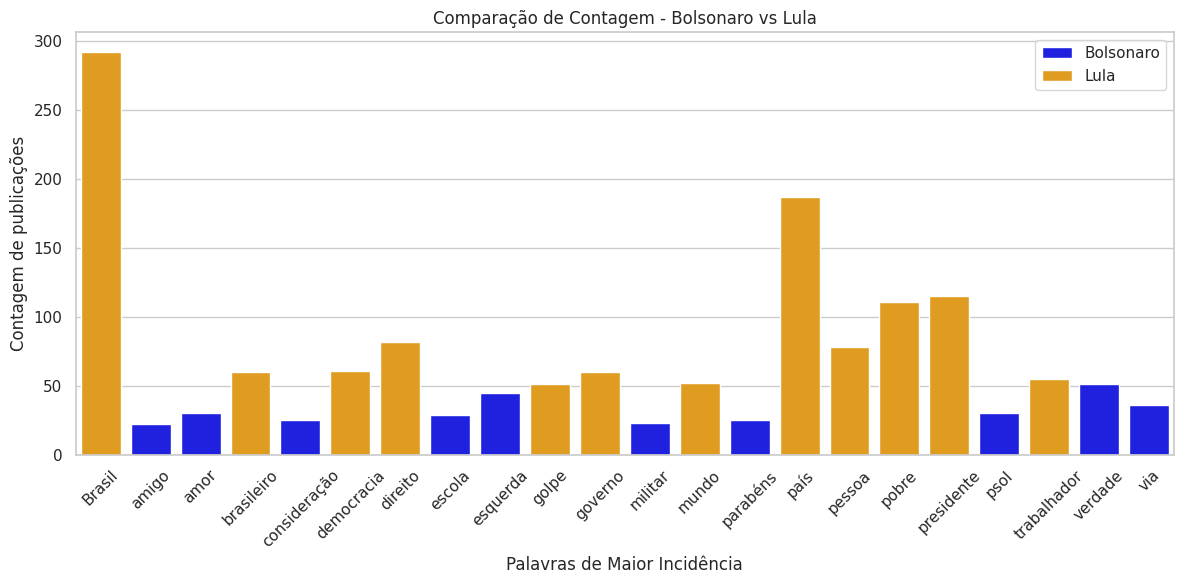

In [ ]:
# Comparação do Engajamento entre os dois candidatos
# levando em consideração a diferença no número de postagens nesse período

sns.set(style="whitegrid")

# Plotando o gráfico das colunas de contagem de postagens
plt.figure(figsize=(12, 6))
sns.barplot(x=df_impeachment.index, y=df_impeachment['len_bolsonaro'], color='blue', label='Bolsonaro')
sns.barplot(x=df_impeachment.index, y=df_impeachment['len_lula'], color='orange', label='Lula')
plt.xlabel('Palavras de Maior Incidência')
plt.ylabel('Contagem de publicações')
plt.title('Comparação de Contagem - Bolsonaro vs Lula')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

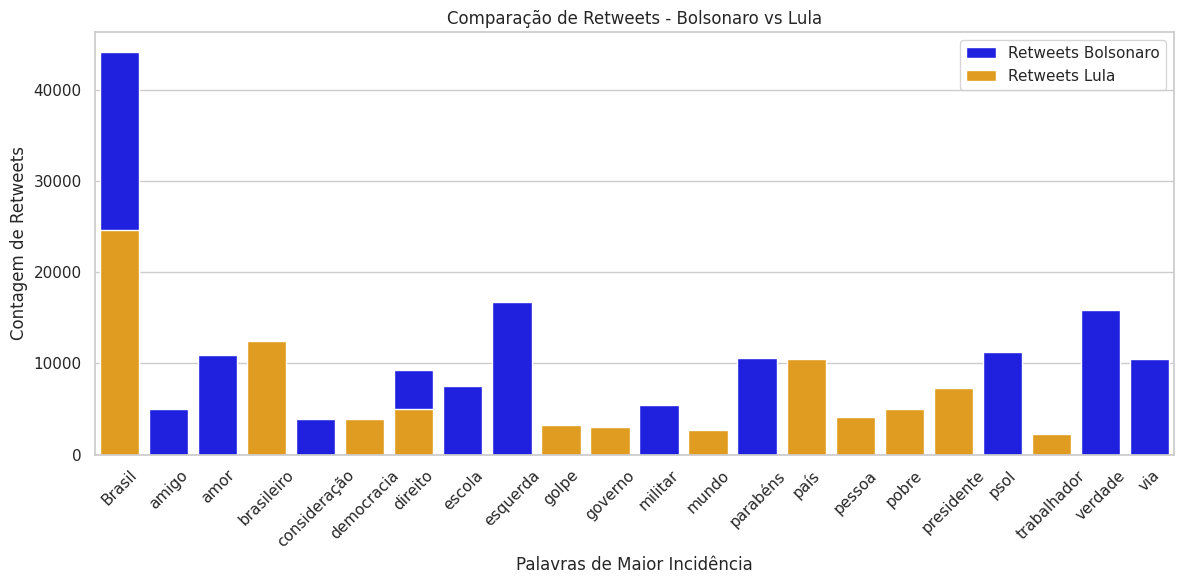

In [ ]:
# Plotando o gráfico comparando as colunas da contagem de retweets
plt.figure(figsize=(12, 6))
sns.barplot(x=df_impeachment.index, y=df_impeachment['retweet_bolsonaro'], color='blue', label='Retweets Bolsonaro')
sns.barplot(x=df_impeachment.index, y=df_impeachment['retweet_lula'], color='orange', label='Retweets Lula')
plt.xlabel('Palavras de Maior Incidência')
plt.ylabel('Contagem de Retweets')
plt.title('Comparação de Retweets - Bolsonaro vs Lula')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

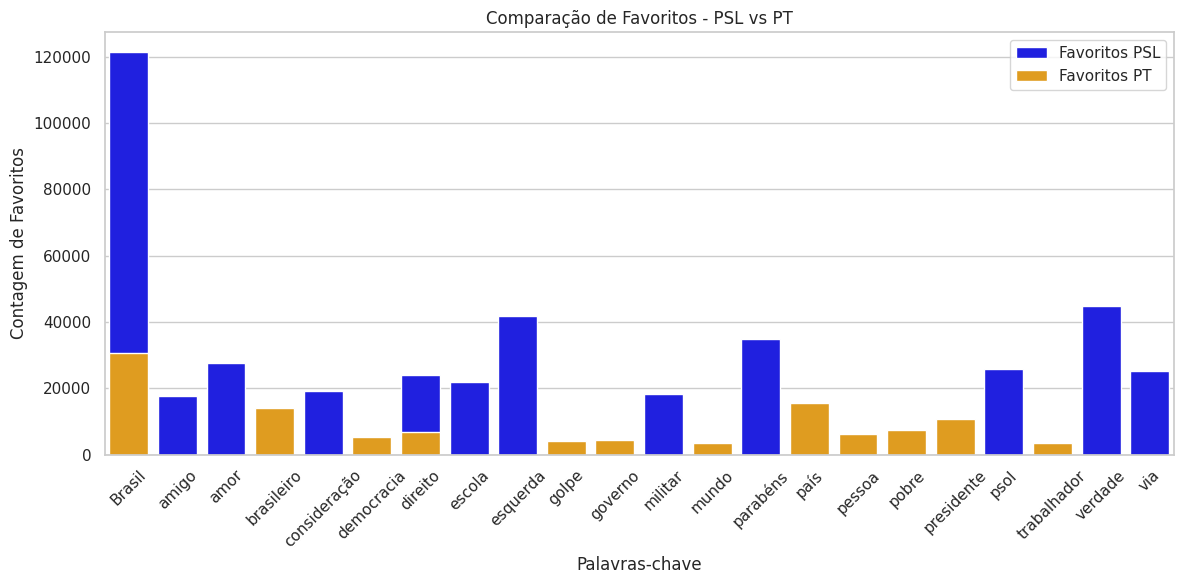

In [ ]:
# Plotando os gráficos comparando as colunas da contagem de favoritos
plt.figure(figsize=(12, 6))
sns.barplot(x=df_impeachment.index, y=df_impeachment['favorite_bolsonaro'], color='blue', label='Favoritos PSL')
sns.barplot(x=df_impeachment.index, y=df_impeachment['favorite_lula'], color='orange', label='Favoritos PT')
plt.xlabel('Palavras-chave')
plt.ylabel('Contagem de Favoritos')
plt.title('Comparação de Favoritos - PSL vs PT')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Copa do Mundo

### Posição do Bolsonaro

In [ ]:
# Posicionamentos do Bolsonaro durante a Copa
copa_bolsonaro = df_bolsonaro_final.loc[(df_bolsonaro_final['data_hora'].dt.year == 2018) &
                                        ((df_bolsonaro_final['data_hora'].dt.month == 6) |
                                        (df_bolsonaro_final['data_hora'].dt.month == 7))]
copa_bolsonaro.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 240 entries, 3261 to 3500
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   full_text           240 non-null    object        
 1   display_text_range  240 non-null    int64         
 2   retweet_count       240 non-null    int64         
 3   favorite_count      240 non-null    int64         
 4   data_hora           240 non-null    datetime64[ns]
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 11.2+ KB


In [ ]:
# Unificando todas as colunas
conteudo_copa_bolsonaro = unir_texto(copa_bolsonaro)

# Aplica a função de tratamento
resultado_copa_bolsonaro = processamento(conteudo_copa_bolsonaro)

In [ ]:
# Excluindo palavras sem relevância
analise_bolsonaro = pd.Series(resultado_copa_bolsonaro).value_counts()
analise_fixed_bolsonaro = analise_bolsonaro.drop(['', '@bolsonarosp', '@carlosbolsonaro', 'obrigar', 'rj', 'sp', 'bolsonaro', 'jair', 'São', 'Rio', 'canal', 'entrevista'], axis=0)

In [ ]:
# Separando as 12 palavras de maior incidência e relevância
count_bolsonaro_copa = pd.Series(count_incidences(copa_bolsonaro, analise_fixed_bolsonaro[0:12].index))
bolsonaro_favorite_copa = pd.Series(count_favorite(copa_bolsonaro, analise_fixed_bolsonaro[0:12].index))
bolsonaro_retweet_copa = pd.Series(count_retweet(copa_bolsonaro, analise_fixed_bolsonaro[0:12].index))

<ipython-input-51-3415c7ee0a2e>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-50-6ee77cf8402a>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



### Posição do Lula

In [ ]:
# Posicionamentos do Lula durante a copa
copa_lula = df_lula_final.loc[(df_lula_final['data_hora'].dt.year == 2018) &
                                        ((df_lula_final['data_hora'].dt.month == 6) |
                                        (df_lula_final['data_hora'].dt.month == 7))]
copa_lula.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 736 entries, 10374 to 11109
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   full_text           736 non-null    object        
 1   display_text_range  736 non-null    int64         
 2   retweet_count       736 non-null    int64         
 3   favorite_count      736 non-null    int64         
 4   data_hora           736 non-null    datetime64[ns]
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 34.5+ KB


In [ ]:
# Unificando todas as colunas
conteudo_copa_lula = unir_texto(copa_lula)

# Aplica a função de tratamento
resultado_copa_lula = processamento(conteudo_copa_lula)

In [ ]:
# Excluindo palavras sem relevância
analise_lula = pd.Series(resultado_copa_lula).value_counts()
analise_fixed_lula = analise_lula.drop(['Lula'], axis=0)

In [ ]:
# Separando as 10 palavras de maior incidência e relevância
count_lula_copa = pd.Series(count_incidences(copa_lula, analise_fixed_lula[0:12].index))
lula_favorite_copa = pd.Series(count_favorite(copa_lula, analise_fixed_lula[0:12].index))
lula_retweet_copa = pd.Series(count_retweet(copa_lula, analise_fixed_lula[0:12].index))

<ipython-input-51-3415c7ee0a2e>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-50-6ee77cf8402a>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



### Análises comparativas (Copa do Mundo)

In [ ]:
df_copa = pd.DataFrame({
    'len_bolsonaro': count_bolsonaro_copa,
    'favorite_bolsonaro': bolsonaro_favorite_copa,
    'retweet_bolsonaro': bolsonaro_retweet_copa,
    'len_lula': count_lula_copa,
    'retweet_lula': lula_retweet_copa,
    'favorite_lula': lula_favorite_copa})

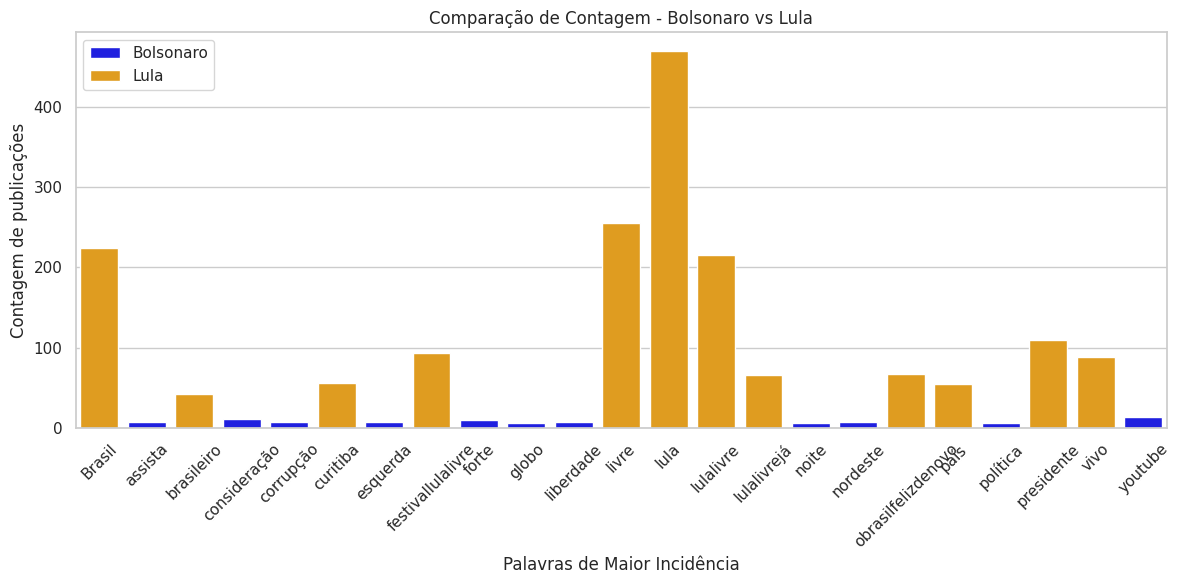

In [ ]:
# Comparação do Engajamento entre os dois candidatos
# levando em consideração a diferença no número de postagens nesse período

sns.set(style="whitegrid")

# Plotando o gráfico das colunas de contagem de postagens
plt.figure(figsize=(12, 6))
sns.barplot(x=df_copa.index, y=df_copa['len_bolsonaro'], color='blue', label='Bolsonaro')
sns.barplot(x=df_copa.index, y=df_copa['len_lula'], color='orange', label='Lula')
plt.xlabel('Palavras de Maior Incidência')
plt.ylabel('Contagem de publicações')
plt.title('Comparação de Contagem - Bolsonaro vs Lula')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

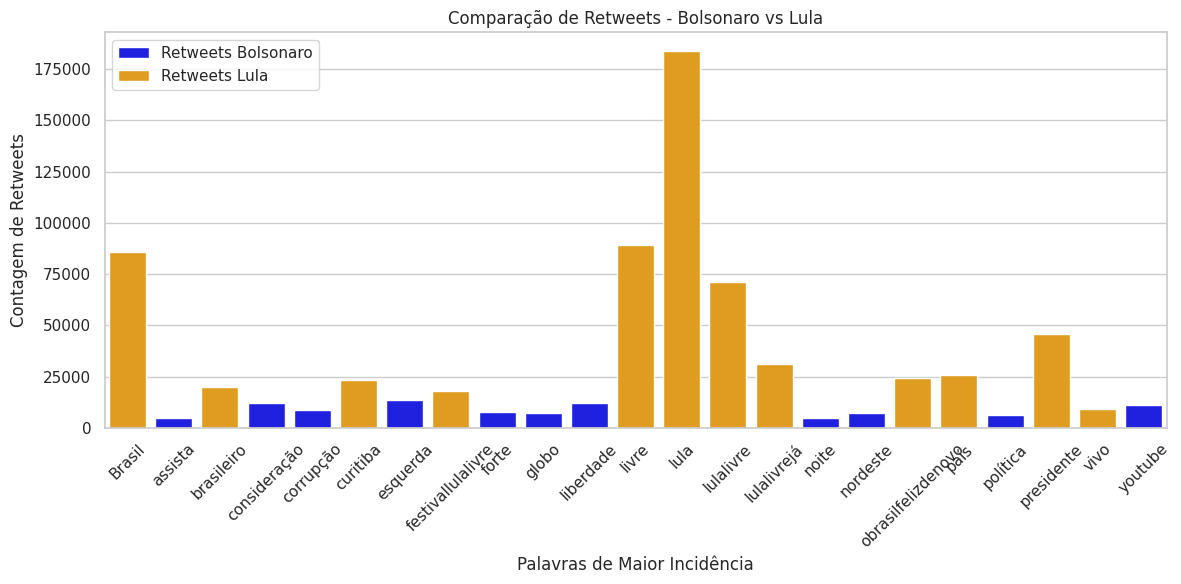

In [ ]:
# Plotando o gráfico comparando as colunas da contagem de retweets
plt.figure(figsize=(12, 6))
sns.barplot(x=df_copa.index, y=df_copa['retweet_bolsonaro'], color='blue', label='Retweets Bolsonaro')
sns.barplot(x=df_copa.index, y=df_copa['retweet_lula'], color='orange', label='Retweets Lula')
plt.xlabel('Palavras de Maior Incidência')
plt.ylabel('Contagem de Retweets')
plt.title('Comparação de Retweets - Bolsonaro vs Lula')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

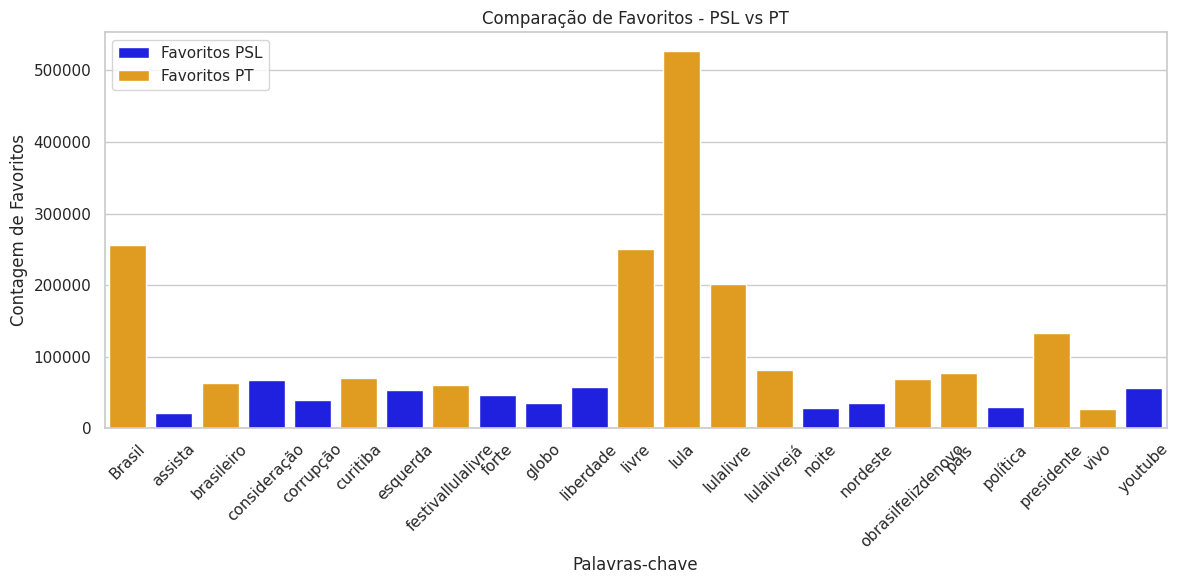

In [ ]:
# Plotando os gráficos comparando as colunas da contagem de favoritos
plt.figure(figsize=(12, 6))
sns.barplot(x=df_copa.index, y=df_copa['favorite_bolsonaro'], color='blue', label='Favoritos PSL')
sns.barplot(x=df_copa.index, y=df_copa['favorite_lula'], color='orange', label='Favoritos PT')
plt.xlabel('Palavras-chave')
plt.ylabel('Contagem de Favoritos')
plt.title('Comparação de Favoritos - PSL vs PT')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Eleições



### Bolsonaro - PSL

In [ ]:
# Abrindo a base de dados
elections_psl = df_bolsonaro_final.loc[df_bolsonaro_final['data_hora'].dt.year == 2018]

In [ ]:
# equalizando as palavras da coluna 'full_text'
elections_psl['full_text'] = elections_psl['full_text'].str.lower()

<ipython-input-74-192ba49dc11a>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
lista_palavras_chave = ['presidente', 'pt', 'fakenews', 'esquerda',
                        'lula', 'deus', 'pátria', 'família', 'luta',
                        'lava jato', 'economia', 'valores', 'igualdade',
                        'ditadura', '13', '22', 'previdência', 'direita',
                        'mensalão', 'bolsonaro','corrupção', 'brasileiro']

In [ ]:
# Salvando a contagem da incidência de cada palavra-chave
count_psl = count_incidences(elections_psl, lista_palavras_chave)

In [ ]:
# Salvando a soma dos favoritos a partir das palavras-chave
favorite_psl = count_favorite(elections_psl, lista_palavras_chave)

<ipython-input-51-3415c7ee0a2e>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
# Salvando a soma dos favoritos a partir das palavras-chave
retweet_psl = count_retweet(elections_psl, lista_palavras_chave)

<ipython-input-50-6ee77cf8402a>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



### Lula - PT

In [ ]:
elections_pt = df_lula_final.loc[df_lula_final['data_hora'].dt.year == 2018]

In [ ]:
# equalizando as palavras da coluna 'full_text'
elections_pt['full_text'] = elections_pt['full_text'].str.lower()

<ipython-input-80-96663e3dfb64>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
# Salvando a contagem da incidência de cada palavra-chave
count_pt = count_incidences(elections_pt, lista_palavras_chave)

In [ ]:
# Salvando a soma dos retweets a partir das palavras-chave
retweet_pt = count_retweet(elections_pt, lista_palavras_chave)

<ipython-input-50-6ee77cf8402a>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
# Salvando a soma dos favoritos a partir das palavras-chave
favorite_pt = count_favorite(elections_pt, lista_palavras_chave)

<ipython-input-51-3415c7ee0a2e>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



### Análises comparativas da Eleição à Presidência de 2018

In [ ]:
# Criando um dataframe com os dados que serão analisados
series_count_psl = pd.Series(count_psl)
series_retweet_psl = pd.Series(retweet_psl)
series_favorite_psl = pd.Series(favorite_psl)
series_count_pt = pd.Series(count_pt)
series_retweet_pt = pd.Series(retweet_pt)
series_favorite_pt = pd.Series(favorite_pt)

df_elections = pd.DataFrame({
    'count_psl': series_count_psl,
    'retweet_psl': series_retweet_psl,
    'favorite_psl': series_favorite_psl,
    'count_pt': series_count_pt,
    'retweet_pt': series_retweet_pt,
    'favorite_pt': series_favorite_pt})

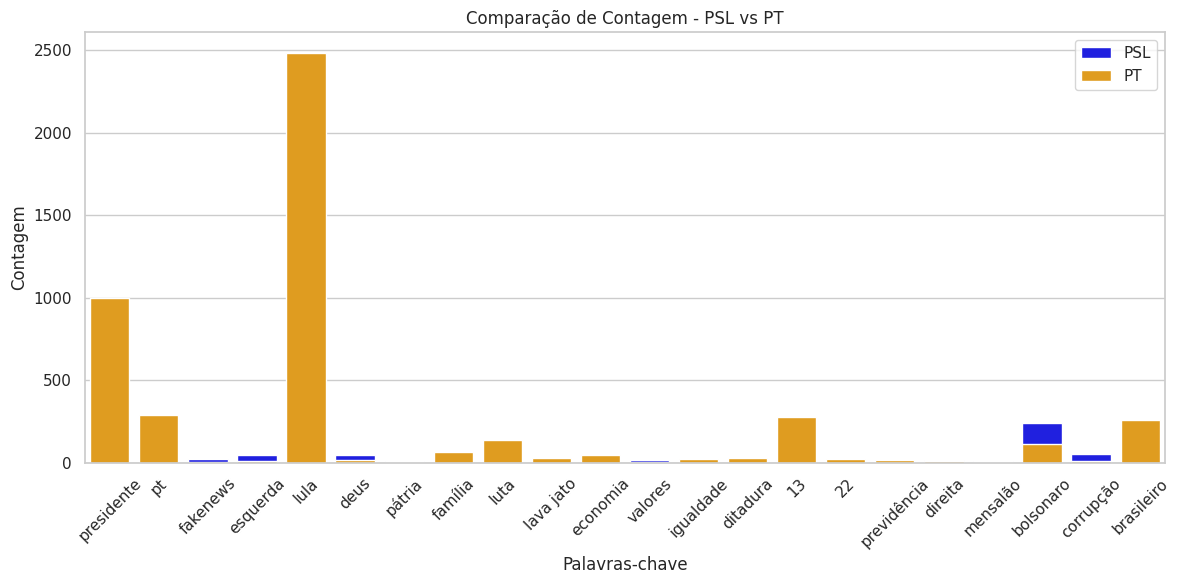

In [ ]:
# Comparação do Engajamento entre os dois candidatos
# levando em consideração a diferença no número de postagens nesse período

sns.set(style="whitegrid")

# Plotando o gráfico das colunas de contagem de postagens
plt.figure(figsize=(12, 6))
sns.barplot(x=df_elections.index, y=df_elections['count_psl'], color='blue', label='PSL')
sns.barplot(x=df_elections.index, y=df_elections['count_pt'], color='orange', label='PT')
plt.xlabel('Palavras-chave')
plt.ylabel('Contagem')
plt.title('Comparação de Contagem - PSL vs PT')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

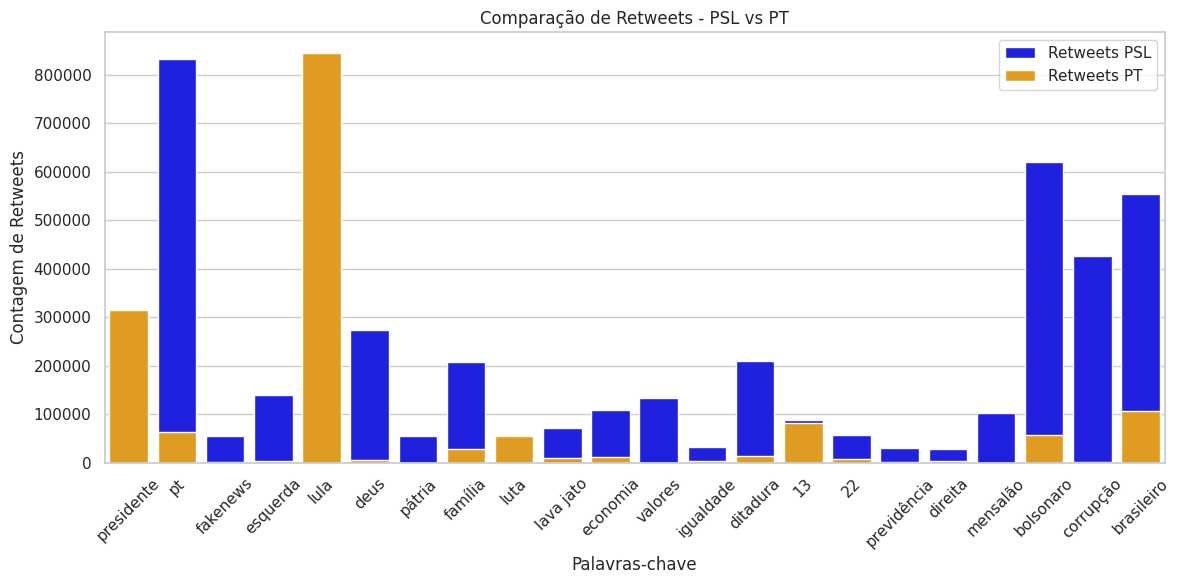

In [ ]:
# Plotando o gráfico comparando as colunas da contagem de retweets
plt.figure(figsize=(12, 6))
sns.barplot(x=df_elections.index, y=df_elections['retweet_psl'], color='blue', label='Retweets PSL')
sns.barplot(x=df_elections.index, y=df_elections['retweet_pt'], color='orange', label='Retweets PT')
plt.xlabel('Palavras-chave')
plt.ylabel('Contagem de Retweets')
plt.title('Comparação de Retweets - PSL vs PT')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

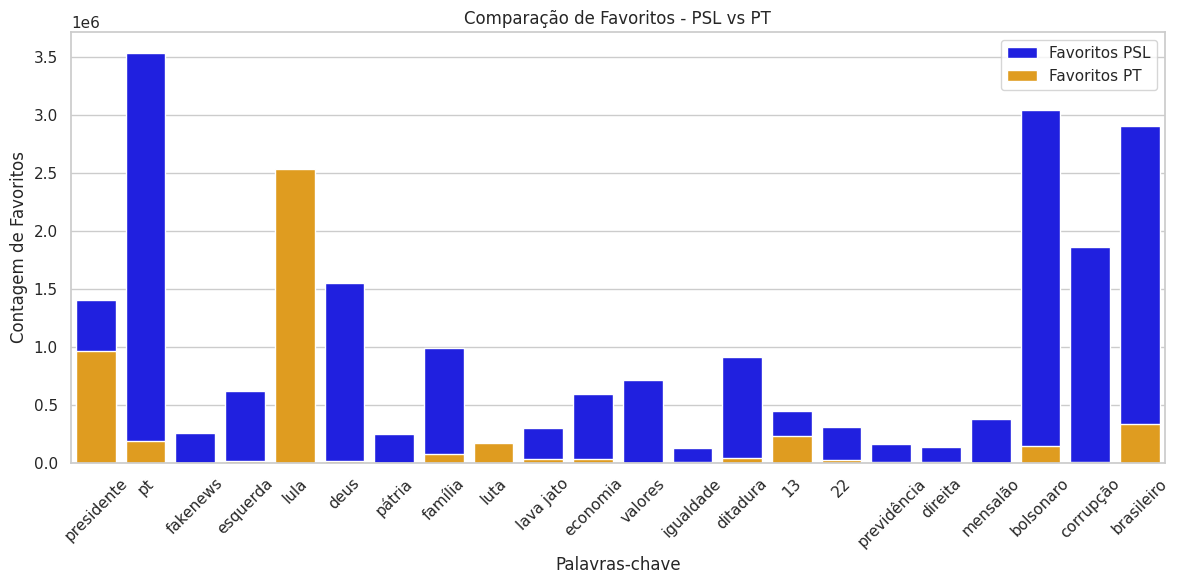

In [ ]:
# Plotando os gráficos comparando as colunas da contagem de favoritos
plt.figure(figsize=(12, 6))
sns.barplot(x=df_elections.index, y=df_elections['favorite_psl'], color='blue', label='Favoritos PSL')
sns.barplot(x=df_elections.index, y=df_elections['favorite_pt'], color='orange', label='Favoritos PT')
plt.xlabel('Palavras-chave')
plt.ylabel('Contagem de Favoritos')
plt.title('Comparação de Favoritos - PSL vs PT')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Predição do posicionamento político do Lula e do Bolsonaro

In [ ]:
# Bibliotecas

# Pré-processamento
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder

# Seleção
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

# Treinamento
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Scores
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix

## Preparando os dados para a aplicação dos modelos

### Dividindo os dados ideologicamente

In [ ]:
# Proporcionalizando os dados e criando a coluna com os rótulos
df_bolsonaro_pred = df_filtrado_bolsonaro.sample(3000).reset_index(drop=True)

df_lula_pred = df_filtrado_lula.sample(3000).reset_index(drop=True)

In [ ]:
# Função para verificar se uma palavra-chave está presente no texto
def verificar_bolsonaro(texto):
    for palavra in palavras_chave_bolsonaro:
        if palavra in texto:
            return 'DIREITA'
    return 'NEUTRO'


def verificar_lula(texto):
    for palavra in palavras_chave_lula:
        if palavra in texto:
            return 'ESQUERDA'
    return 'NEUTRO'


# def verificar_posicionamento(palavra):
#   if palavra in palavras_chave_bolsonaro and palavra in palavras_chave_lula:
#     return 'NEUTRO'
#   elif palavra in palavras_chave_bolsonaro and palavra not in palavras_chave_lula:
#     return 'DIREITA'
#   elif palavra not in palavras_chave_bolsonaro and palavra in palavras_chave_lula:
#     return 'ESQUERDA'
#   else:
#     'NEUTRO'

# def count_dict_posicionamento(texto):
#   default_dict = {'NEUTRO':0,'DIREITA':0, 'ESQUERDA':0}
#   for palavra in texto.split(" "):
#     if verificar_posicionamento(palavra) == 'NEUTRO':
#       default_dict['NEUTRO'] += 1
#     elif verificar_posicionamento(palavra) == 'ESQUERDA':
#       default_dict['ESQUERDA'] += 1
#     else:
#       default_dict['DIREITA'] +=1
#   return max(default_dict, key=default_dict.get)


In [ ]:
# Lista de palavras-chave
palavras_chave_bolsonaro = ['Brasil', 'governo', 'bolsonaro', 'brasileiro', 'país', 'presidente',
       'ministro', 'obrigar', 'economia', 'emprego', 'milhão', 'público',
       'trabalho', 'nacional', 'forte', 'liberdade', 'dever', 'segurança',
       'lei', 'população', 'federal', 'bilhão', 'mundo', 'investimento',
       'pessoa', 'deus', 'região', 'família', 'ministério', 'mudar', 'vida',
       'crescer', 'verdade', 'esquerda', 'corrupção', 'projeto', 'político',
       'criar', 'econômico', 'cidadão', 'desenvolvimento', 'futuro', 'recurso',
       'imprensa', 'crime', 'serviço', 'educação', 'continuar', 'ação',
       'pequeno']


palavras_chave_lula = ['lula', 'Brasil', 'presidente', 'país', 'brasileiro', 'bolsonaro',
       'prender', 'ex-presidente', 'direito', 'prisão', 'político', 'moro',
       'mundo', 'prova', 'candidato', 'crime', 'livre', 'governo', 'liberdade',
       'eleição', 'processo', 'luta', 'história', 'feliz', 'democracia',
       'família', 'solidariedade', 'vencer', 'pessoa', 'pobre', 'globo',
       'receber', 'lutar', 'condenar', 'justiça', 'precisar', 'paz', 'defesa',
       'viver', 'vida', 'preso', 'ódio', 'república', 'impedir', 'acabar',
       'fome', 'ministro', 'verdade', 'votar', 'haddad']

In [ ]:


# Criação da nova coluna 'nova_coluna' com base nas palavras-chave
df_bolsonaro_pred['ideologia'] = df_bolsonaro_pred['full_text'].apply(verificar_bolsonaro)

In [ ]:
# Lista de palavras-chave


# Criação da nova coluna 'nova_coluna' com base nas palavras-chave
df_lula_pred['ideologia'] = df_lula_pred['full_text'].apply(verificar_lula)

### Unindo as bases de dados

In [ ]:
# Unindo as base de dados
df_pred = pd.concat([df_bolsonaro_pred, df_lula_pred]).reset_index(drop=True)

# Extraindo apenas os anos da coluna 'data_hora' pois possui uma correlação significativa
df_pred['year'] = df_pred['data_hora'].dt.year

In [ ]:
df_pred.head()

,full_text,display_text_range,retweet_count,favorite_count,data_hora,ideologia,index,year
0,Aquicultura em desenvolvimento no Brasil com o...,144,2057,16567,2019-02-22 19:00:00,DIREITA,NaN,2019
1,Informação sobre possível candidatura à Presid...,100,459,1435,2016-08-09 17:00:00,DIREITA,NaN,2016
2,Entendi! Valeu!,15,2526,22407,2018-10-26 21:00:00,NEUTRO,NaN,2018
3,@feitosamaria Boa noite e muito obrigado! 👍,43,55,1382,2019-05-29 00:00:00,NEUTRO,NaN,2019
4,Houve contratações também nas atividades: Cons...,275,2700,18198,2019-09-28 15:00:00,DIREITA,NaN,2019


In [ ]:
df_pred

,full_text,display_text_range,retweet_count,favorite_count,data_hora,ideologia,index,year
0,Aquicultura em desenvolvimento no Brasil com o...,144,2057,16567,2019-02-22 19:00:00,DIREITA,NaN,2019
1,Informação sobre possível candidatura à Presid...,100,459,1435,2016-08-09 17:00:00,DIREITA,NaN,2016
2,Entendi! Valeu!,15,2526,22407,2018-10-26 21:00:00,NEUTRO,NaN,2018
3,@feitosamaria Boa noite e muito obrigado! 👍,43,55,1382,2019-05-29 00:00:00,NEUTRO,NaN,2019
4,Houve contratações também nas atividades: Cons...,275,2700,18198,2019-09-28 15:00:00,DIREITA,NaN,2019
...,...,...,...,...,...,...,...,...
5995,13 razões para absolver Lula no caso do Tríple...,71,148,314,2017-06-21 19:00:00,NEUTRO,4799.0,2017
5996,O que esses analfabetos políticos não sabem é ...,103,84,196,2017-08-19 15:00:00,ESQUERDA,5750.0,2017
5997,"""2017 é o ano para recuperarmos a imagem do @p...",55,27,79,2017-01-19 22:00:00,NEUTRO,3709.0,2017
5998,Desmontaram a indústria naval que montamos par...,121,66,94,2017-10-29 20:00:00,ESQUERDA,8263.0,2017


### Tratando as colunas categóricas

In [ ]:
# Transformando dados categóricos em numéricos
le = LabelEncoder()

col_transformed = le.fit_transform(df_pred['ideologia'])

df_pred['ideologia'] = col_transformed

<ipython-input-98-ab12e671023e>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



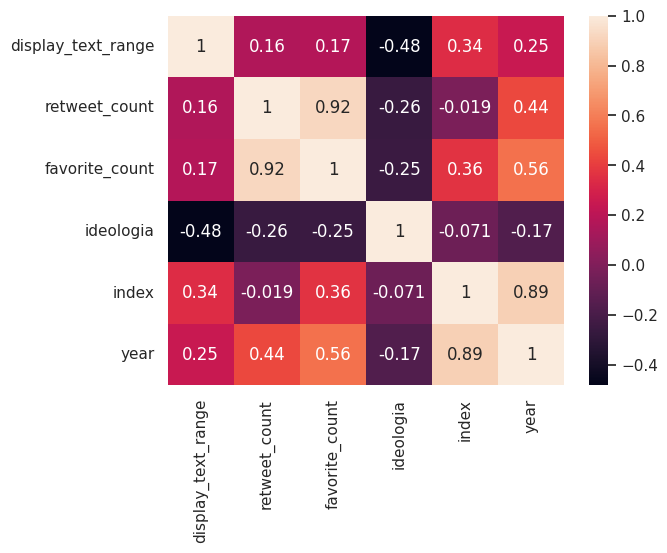

In [ ]:
#  Visualizando as correlações
corr_df = df_pred.corr()
corr_df['ideologia'].sort_values(ascending=False)

sns.heatmap(corr_df, annot=True)

plt.show()

In [ ]:
# Dropando as colunas que não serão utilizadas
df_pred = df_pred.drop(['index', 'full_text', 'data_hora', 'display_text_range'], axis=1)

In [ ]:
df_pred

,retweet_count,favorite_count,ideologia,year
0,2057,16567,0,2019
1,459,1435,0,2016
2,2526,22407,2,2018
3,55,1382,2,2019
4,2700,18198,0,2019
...,...,...,...,...
5995,148,314,2,2017
5996,84,196,1,2017
5997,27,79,2,2017
5998,66,94,1,2017


### Separando os dados de treino e teste

In [ ]:
# Separando em treino e teste
X = df_pred[['retweet_count', 'favorite_count', 'year']]

y = df_pred['ideologia']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Regressão Linear

In [ ]:
# Regressão Linear
lin_reg = LinearRegression()

lin_reg.fit(X_train, y_train)

lin_prediction = lin_reg.predict(X_test)

In [ ]:
# Visualiza a predição dos dados de treino
some_data = X_train.iloc[:10]
some_labels = y_train[:10]

print('Predicitons:', np.around(lin_reg.predict(some_data)))
print('Labels:', list(some_labels))

Predicitons: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Labels: [1, 1, 2, 2, 2, 0, 1, 2, 0, 1]


In [ ]:
# Melhores hiperparâmetros encontrados
# Calcular o MSE
lin_mse = mean_squared_error(y_test, lin_prediction)
print(f"MSE: {lin_mse:.4f}")

# Calcular o R²
lin_r2 = r2_score(y_test, lin_prediction)
print(f"R²: {lin_r2:.4f}")

MSE: 0.6109
R²: 0.0791


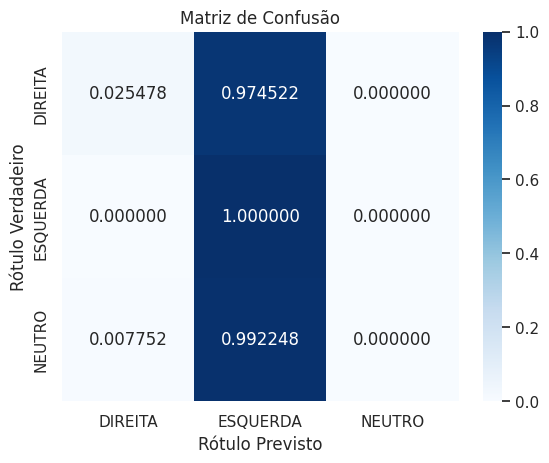

In [ ]:
# Visualizando o comportamento do modelo através da confusion matrix
cm = confusion_matrix(y_test, np.around(lin_prediction), normalize = 'true')
classes = ['DIREITA', 'ESQUERDA', 'NEUTRO']

sns.heatmap(cm, annot=True, fmt='f', cmap='Blues', xticklabels=classes, yticklabels=classes)

# Configurar os rótulos dos eixos e o título

plt.xlabel('Rótulo Previsto')
plt.ylabel('Rótulo Verdadeiro')
plt.title('Matriz de Confusão')

# Mostrar o gráfico
plt.show()

## Regressão Logística

In [ ]:
# Treinando o Modelo
logistic_reg = LogisticRegression(multi_class = "multinomial", solver = "lbfgs", max_iter = 300)

logistic_reg.fit(X_train,y_train)

logistic_prediction = logistic_reg.predict(X_test)

In [ ]:
# Visualiza a predição dos dados de treino
some_data = X_train.iloc[:10]
some_labels = y_train[:10]

print('Predicitons:', logistic_reg.predict(some_data))
print('Labels:', list(some_labels))

Predicitons: [1 1 2 0 2 2 1 1 2 1]
Labels: [1, 1, 2, 2, 2, 0, 1, 2, 0, 1]


In [ ]:
# Model Evaluation metrics

# Calcular o MSE
logistic_mse = mean_squared_error(y_test, logistic_prediction)
print(f"MSE: {logistic_mse:.4f}")

# Calcular o R²
logistic_r2 = -r2_score(y_test, logistic_prediction)
print(f"R²: {logistic_r2:.4f}")

MSE: 1.0892
R²: 0.6420


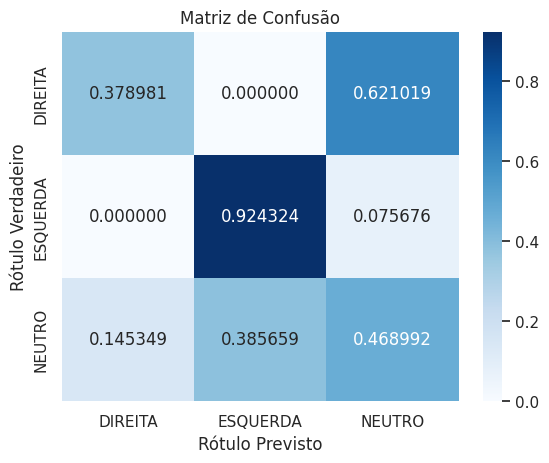

In [ ]:
# Visualizando o comportamento do modelo através da confusion matrix
cm = confusion_matrix(y_test, np.around(logistic_prediction), normalize = 'true')
classes = ['DIREITA', 'ESQUERDA', 'NEUTRO']

sns.heatmap(cm, annot=True, fmt='f', cmap='Blues', xticklabels=classes, yticklabels=classes)

# Configurar os rótulos dos eixos e o título

plt.xlabel('Rótulo Previsto')
plt.ylabel('Rótulo Verdadeiro')
plt.title('Matriz de Confusão')

# Mostrar o gráfico
plt.show()

## Árvore de Decisão

In [ ]:
# Árvore de Decisão
decision_tree = DecisionTreeRegressor()

fit_tree = decision_tree.fit(X_train, y_train)

tree_prediction = decision_tree.predict(X_test)

In [ ]:
# Visualiza a predição dos dados de treino
some_data = X_train.iloc[:10]
some_labels = y_train[:10]

print('Predicitons:', decision_tree.predict(some_data))
print('Labels:', list(some_labels))

Predicitons: [1. 1. 2. 2. 2. 0. 1. 2. 0. 1.]
Labels: [1, 1, 2, 2, 2, 0, 1, 2, 0, 1]


In [ ]:
# Melhores hiperparâmetros encontrados
# Calcular o MSE
tree_mse = mean_squared_error(y_test, tree_prediction)
print(f"MSE: {tree_mse:.4f}")

# Calcular o R²
tree_r2 = -r2_score(y_test, tree_prediction)
print(f"R²: {tree_r2:.4f}")

MSE: 1.1860
R²: 0.7880


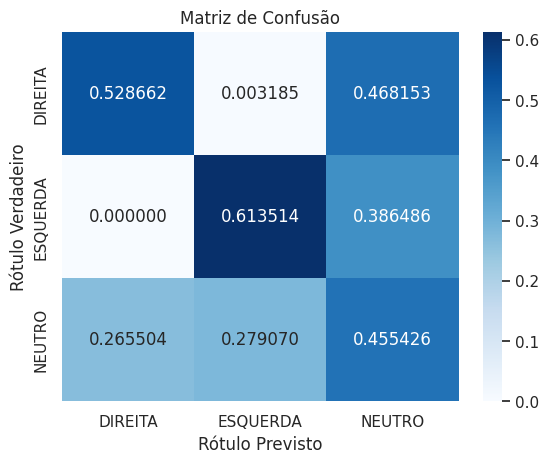

In [ ]:
# Visualizando o comportamento do modelo através da confusion matrix
cm = confusion_matrix(y_test, np.around(tree_prediction), normalize = 'true')
classes = ['DIREITA', 'ESQUERDA', 'NEUTRO']

sns.heatmap(cm, annot=True, fmt='f', cmap='Blues', xticklabels=classes, yticklabels=classes)

# Configurar os rótulos dos eixos e o título

plt.xlabel('Rótulo Previsto')
plt.ylabel('Rótulo Verdadeiro')
plt.title('Matriz de Confusão')

# Mostrar o gráfico
plt.show()

## Random Forest Regressor

In [ ]:
# Treinando o modelo
random_forest = RandomForestRegressor()

random_forest.fit(X_train, np.ravel(y_train))

forest_prediction = random_forest.predict(X_test)

In [ ]:
# Visualiza a predição dos dados de treino
some_data = X_train.iloc[:10]
some_labels = y_train[:10]

print('Predicitons:', np.around(random_forest.predict(some_data)))
print('Labels:', list(some_labels))

Predicitons: [1. 1. 2. 2. 2. 0. 1. 2. 1. 1.]
Labels: [1, 1, 2, 2, 2, 0, 1, 2, 0, 1]


In [ ]:
# Melhores hiperparâmetros encontrados
# Calcular o MSE
forest_mse = mean_squared_error(y_test, forest_prediction)
print(f"MSE: {forest_mse:.4f}")

# Calcular o R²
forest_r2 = -r2_score(y_test, forest_prediction)
print(f"R²: {forest_r2:.4f}")

MSE: 0.6912
R²: 0.0420


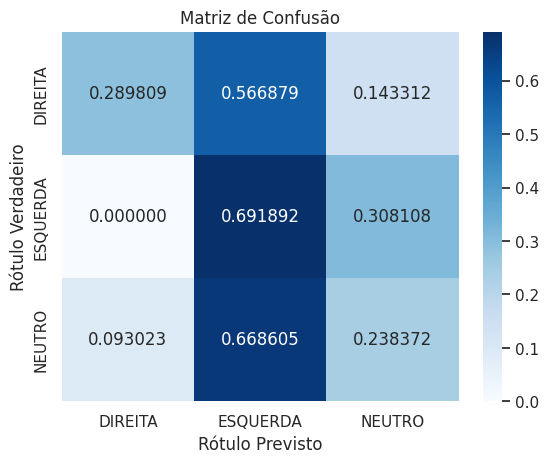

In [ ]:
# Visualizando o comportamento do modelo através da confusion matrix
cm = confusion_matrix(y_test, np.around(forest_prediction), normalize = 'true')
classes = ['DIREITA', 'ESQUERDA', 'NEUTRO']

sns.heatmap(cm, annot=True, fmt='f', cmap='Blues', xticklabels=classes, yticklabels=classes)

# Configurar os rótulos dos eixos e o título

plt.xlabel('Rótulo Previsto')
plt.ylabel('Rótulo Verdadeiro')
plt.title('Matriz de Confusão')

# Mostrar o gráfico
plt.show()

## Análises comparativas entre as métricas

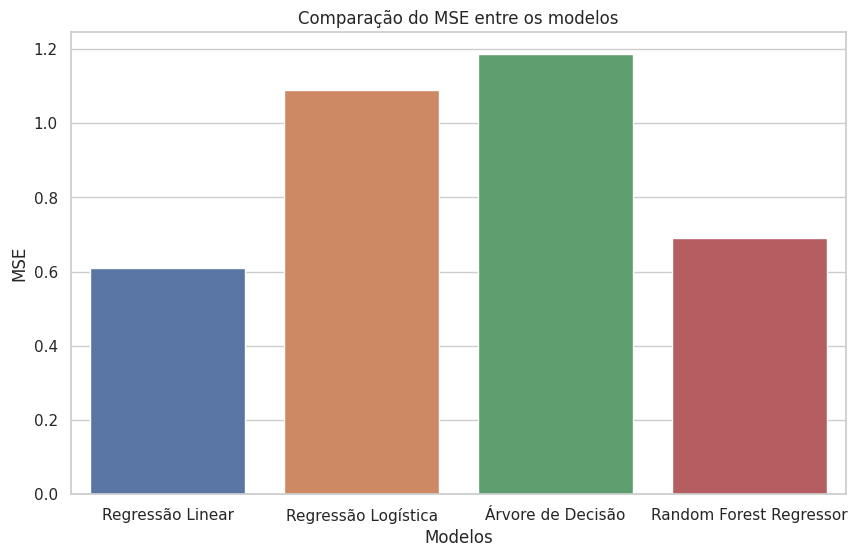

In [ ]:
# Métricas MSE
mse_values = [lin_mse, logistic_mse, tree_mse, forest_mse]
models = ['Regressão Linear', 'Regressão Logística', 'Árvore de Decisão', 'Random Forest Regressor']

plt.figure(figsize=(10, 6))
sns.barplot(x=models, y=mse_values)
plt.title('Comparação do MSE entre os modelos')
plt.xlabel('Modelos')
plt.ylabel('MSE')
plt.show()

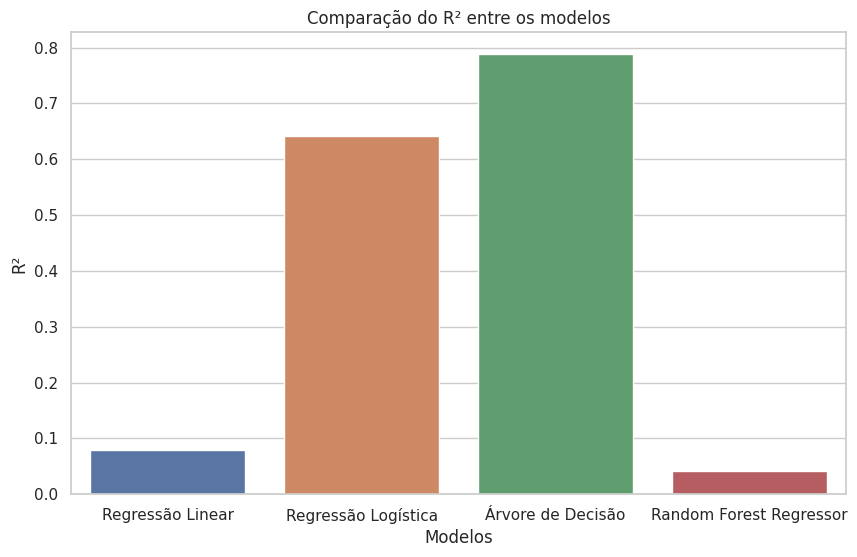

In [ ]:
# Métricas R²
r2_values = [lin_r2, logistic_r2, tree_r2, forest_r2]

plt.figure(figsize=(10, 6))
sns.barplot(x=models, y=r2_values)
plt.title('Comparação do R² entre os modelos')
plt.xlabel('Modelos')
plt.ylabel('R²')
plt.show()